# Part I : end-to-end machine learning

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2021)

In [3]:
# 실습용 파일 다운로드

from urllib import request

url = "https://raw.githubusercontent.com/jehyunlee/2021_KSES_ML/main/penguins_kses.pkl"
savename = "data.pkl"

request.urlretrieve(url, savename)

('data.pkl', <http.client.HTTPMessage at 0x7fa654427790>)

In [178]:
# 실습용 파일 열기

df = pd.read_pickle("data.pkl")
df.head()

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
1,1775,Gentoo,Biscoe,Female,43.3,13.4,209.0,4400.0
2,1076,Adelie,Torgersen,Male,39.7,18.4,190.0,3900.0
3,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
4,1377,Adelie,Biscoe,Male,42.7,18.3,196.0,4075.0


In [5]:
# 일단 머신러닝

In [6]:
# target feature
y = df["body_mass_g"]

# input features
X = df.drop(["body_mass_g", "id"], axis=1)
X.head()

,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Gentoo,Biscoe,Male,55.9,17.0,228.0
1,Gentoo,Biscoe,Female,43.3,13.4,209.0
2,Adelie,Torgersen,Male,39.7,18.4,190.0
3,Gentoo,Biscoe,Male,55.9,17.0,228.0
4,Adelie,Biscoe,Male,42.7,18.3,196.0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [8]:
# 머신러닝 모델 : RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# 학습: 인코딩 에러 발생
rf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Chinstrap'

In [9]:
X_train.head()

,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm
680,Chinstrap,Dream,Male,49.2,18.2,195.0
517,Gentoo,Biscoe,Male,50.0,16.3,230.0
548,Gentoo,Biscoe,Female,46.5,14.5,213.0
86,Gentoo,Biscoe,Male,55.9,17.0,228.0
11,Adelie,Biscoe,Male,40.1,18.9,188.0


In [10]:
# categorical features one-hot encoding
X_train = pd.get_dummies(X_train)
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
680,49.2,18.2,195.0,0,1,0,0,1,0,0,1
517,50.0,16.3,230.0,0,0,1,1,0,0,0,1
548,46.5,14.5,213.0,0,0,1,1,0,0,1,0
86,55.9,17.0,228.0,0,0,1,1,0,0,0,1
11,40.1,18.9,188.0,1,0,0,1,0,0,0,1


In [11]:
# 다시 학습 : 결측치 에러 발생

rf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [12]:
# 학습데이터 X 결측치 확인

X_train.isnull().sum()

bill_length_mm       3
bill_depth_mm        3
flipper_length_mm    3
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [13]:
X_train.loc[X_train["bill_length_mm"].isnull()]

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
94,NaN,NaN,NaN,0,0,1,1,0,0,0,0
295,NaN,NaN,NaN,1,0,0,0,0,1,0,0
280,NaN,NaN,NaN,0,0,1,1,0,0,0,0


In [14]:
# 결측치 제거

X_train = X_train.dropna()
X_train.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [15]:
# 다시 학습 시도 : 또 결측치

rf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [16]:
# y 인자 결측치 확인

y_train.isnull().sum()

4

In [17]:
y_train.loc[y_train.isnull()]

463   NaN
94    NaN
295   NaN
280   NaN
Name: body_mass_g, dtype: float64

In [18]:
# y 인자 결측치 제거

y_train = y_train.dropna()
y_train.isnull().sum()

0

In [19]:
# 다시 학습 : 에러 - 데이터 수 불일치

rf.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [515, 514]

In [20]:
# 데이터 수 강제 맞춤

X_train = X_train.drop(index=463)

In [21]:
# 다시 학습

rf.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
# 예측 : 에러 - categorical feature
y_pred_test = rf.predict(X_test)

ValueError: could not convert string to float: 'Chinstrap'

In [23]:
# one-hot encoding

X_test = pd.get_dummies(X_test)
X_test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
617,52.0,19.0,197.0,0,1,0,0,1,0,0,1
343,37.0,16.9,185.0,1,0,0,0,1,0,1,0
101,46.6,17.8,193.0,0,1,0,0,1,0,1,0
197,45.5,15.0,220.0,0,0,1,1,0,0,0,1
597,50.0,16.3,230.0,0,0,1,1,0,0,0,1


In [24]:
# testset 결측치 처리

X_test.isnull().sum()

bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [25]:
X_test.loc[X_test["bill_length_mm"].isnull()]

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
698,NaN,NaN,NaN,1,0,0,0,0,1,0,0


In [26]:
X_test = X_test.dropna()
X_test.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [27]:
y_test.isnull().sum()

1

In [28]:
y_test.loc[y_test.isnull()]

698   NaN
Name: body_mass_g, dtype: float64

In [29]:
y_test = y_test.dropna()

In [30]:
# 머신러닝 예측 (1) 학습 데이터

y_train_pred = rf.predict(X_train)

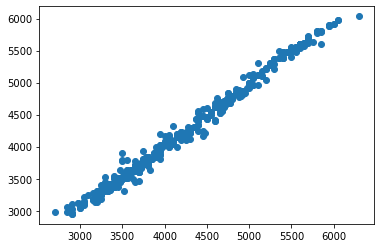

In [31]:
# 예측 결과 시각화
plt.scatter(y_train, y_train_pred)

In [32]:
# 정확도 확인

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
print(f"# R2_train = {r2_train}")

# R2_train = 0.9909526438598597


In [33]:
# 머신러닝 예측 (2) 테스트 데이터

y_test_pred = rf.predict(X_test)

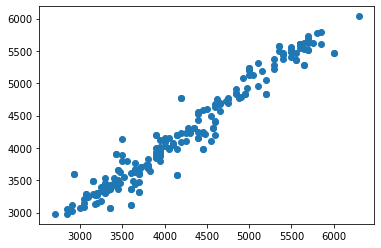

In [34]:
# 예측 결과 시각화
plt.scatter(y_test, y_test_pred)

In [35]:
# 정확도 확인

r2_test = r2_score(y_test, y_test_pred)
print(f"# R2_test = {r2_test}")

# R2_test = 0.9431233291642835


In [36]:
# 인자 중요도

fi = rf.feature_importances_
fi

array([4.54048699e-02, 4.15666005e-02, 5.25326187e-02, 5.13092763e-04,
       5.95105971e-04, 6.80609932e-01, 2.54388102e-03, 1.96487439e-03,
       2.25925313e-03, 1.93981368e-02, 1.52611635e-01])

<BarContainer object of 11 artists>

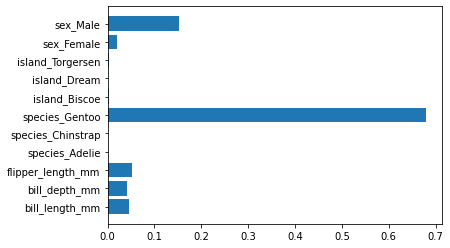

In [37]:
plt.barh(X_train.columns, fi)

In [38]:
# noise 섞기

X_train["noise"] = np.random.random(size=X_train.shape[0])
X_test["noise"] = np.random.random(size=X_test.shape[0])
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male,noise
680,49.2,18.2,195.0,0,1,0,0,1,0,0,1,0.823791
517,50.0,16.3,230.0,0,0,1,1,0,0,0,1,0.305151
548,46.5,14.5,213.0,0,0,1,1,0,0,1,0,0.307543
86,55.9,17.0,228.0,0,0,1,1,0,0,0,1,0.201323
11,40.1,18.9,188.0,1,0,0,1,0,0,0,1,0.265165


In [39]:
# 다시 머신러닝, 정확도, 인자 중요도 확인

rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
r2_test_noise = r2_score(y_test, y_test_pred)
print(f"R2_test_noise = {r2_test_noise}")

R2_test_noise = 0.9431233291642835


<BarContainer object of 12 artists>

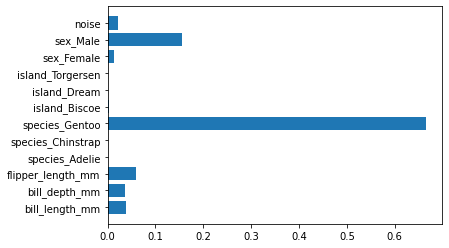

In [40]:
fi_noise = rf.feature_importances_
plt.barh(X_train.columns, fi_noise)

# Part II : Data Preprocessing

## Overview

In [70]:
# 데이터 훑어보기 1. 전체 정보

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 740 non-null    int64  
 1   species            740 non-null    object 
 2   island             740 non-null    object 
 3   sex                718 non-null    object 
 4   bill_length_mm     736 non-null    float64
 5   bill_depth_mm      736 non-null    float64
 6   flipper_length_mm  736 non-null    float64
 7   body_mass_g        735 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 46.4+ KB


In [71]:
# 데이터 훑어보기 2. 데이터 값들

df.describe() # include="all"
df.describe(include="all")

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,740.000000,740,740,718,736.000000,736.000000,736.000000,735.000000
unique,NaN,3,3,2,NaN,NaN,NaN,NaN
top,NaN,Adelie,Biscoe,Male,NaN,NaN,NaN,NaN
freq,NaN,310,377,381,NaN,NaN,NaN,NaN
mean,1493.674324,NaN,NaN,NaN,43.305340,16.705136,196.905163,4265.612245
std,293.713475,NaN,NaN,NaN,8.800235,3.194694,33.607498,830.781472
min,1000.000000,NaN,NaN,NaN,3.770000,1.350000,18.800000,2700.000000
25%,1213.750000,NaN,NaN,NaN,39.000000,15.400000,190.000000,3587.500000
50%,1490.000000,NaN,NaN,NaN,44.500000,17.100000,197.000000,4100.000000
75%,1748.000000,NaN,NaN,NaN,49.000000,18.600000,215.000000,4887.500000


## Cleansing

In [72]:
# 결측치 확인 1. 수
df.isnull().sum()

id                    0
species               0
island                0
sex                  22
bill_length_mm        4
bill_depth_mm         4
flipper_length_mm     4
body_mass_g           5
dtype: int64

In [73]:
# 결측치 확인 2. 행

df.loc[df["body_mass_g"].isnull()]

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
94,1035,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
280,1035,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
295,1850,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
463,1452,Gentoo,Biscoe,NaN,44.5,14.3,216.0,NaN
698,1850,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


In [74]:
df.loc[df["sex"].isnull()]

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
32,1894,Adelie,Torgersen,NaN,37.8,17.1,186.0,3300.0
68,1362,Adelie,Torgersen,NaN,42.0,20.2,190.0,4250.0
94,1035,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
188,1894,Adelie,Torgersen,NaN,37.8,17.1,186.0,3300.0
213,1379,Gentoo,Biscoe,NaN,46.2,14.4,214.0,4650.0
233,1587,Gentoo,Biscoe,NaN,47.3,13.8,216.0,4725.0
247,1825,Adelie,Torgersen,NaN,34.1,18.1,193.0,3475.0
280,1035,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
290,1825,Adelie,Torgersen,NaN,34.1,18.1,193.0,3475.0
293,1379,Gentoo,Biscoe,NaN,46.2,14.4,214.0,4650.0


In [75]:
# 결측치 처리 1. 신체 데이터 결측 - 삭제
df.dropna(subset=["sex"], axis=0, inplace=True)
df

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
1,1775,Gentoo,Biscoe,Female,43.3,13.4,209.0,4400.0
2,1076,Adelie,Torgersen,Male,39.7,18.4,190.0,3900.0
3,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
4,1377,Adelie,Biscoe,Male,42.7,18.3,196.0,4075.0
...,...,...,...,...,...,...,...,...
735,1512,Adelie,Biscoe,Male,37.8,20.0,190.0,4250.0
736,1744,Chinstrap,Dream,Female,47.6,18.3,195.0,3850.0
737,1025,Adelie,Dream,Female,39.5,17.8,188.0,3300.0
738,1586,Adelie,Dream,Female,32.1,15.5,188.0,3050.0


In [184]:
# 중복값 확인
df.duplicated(["id"]).sum()

396

In [185]:
df.loc[df.duplicated(["id"])].sort_values("id")

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
687,1000,Gentoo,Biscoe,Male,50.4,15.7,222.0,5750.0
686,1001,Gentoo,Biscoe,Male,50.1,15.0,225.0,5000.0
470,1002,Chinstrap,Dream,Male,50.0,19.5,196.0,3900.0
674,1004,Gentoo,Biscoe,Female,47.4,14.6,212.0,4725.0
230,1006,Adelie,Biscoe,Male,39.7,18.9,184.0,3550.0
...,...,...,...,...,...,...,...,...
572,1984,Chinstrap,Dream,Male,51.5,18.7,187.0,3250.0
242,1985,Adelie,Dream,Female,36.0,17.1,187.0,3700.0
604,1990,Gentoo,Biscoe,Female,47.5,14.0,212.0,4875.0
451,1992,Adelie,Biscoe,Female,39.7,17.7,193.0,3200.0


In [186]:
df.query("id == 1196")

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
3,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
33,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
77,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
86,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
91,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
115,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
117,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
140,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
146,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0


In [187]:
# 중복값 처리
df.drop_duplicates(["id"], inplace=True)
df.shape

(344, 8)

In [193]:
df_tmp = df.loc[(df["bill_length_mm"] > 10 ) & (df["bill_length_mm"] < 37 )]
df = df.append(df_tmp)
df = df.append(df_tmp)
df = df.append(df_tmp)
df = df.append(df_tmp)
df = df.append(df_tmp)

In [ ]:
df = df.sample(frac=1)
df.to_pickle("pe")

<AxesSubplot:xlabel='species', ylabel='count'>

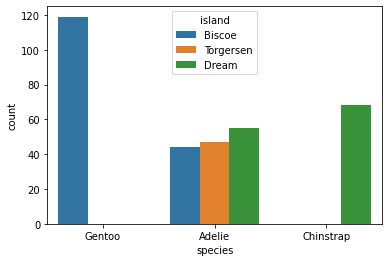

In [80]:
# 데이터 분포 확인 1. categorical features
sns.countplot(x=df["species"], hue=df["island"])

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

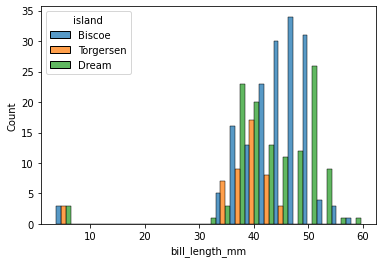

In [81]:
# 데이터 분포 확인 2. numerical features
sns.histplot(x=df["bill_length_mm"], hue=df["island"], multiple="dodge")

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

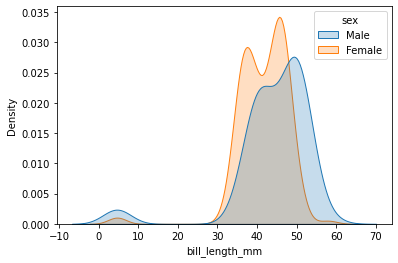

In [82]:
sns.kdeplot(x=df["bill_length_mm"], hue=df["sex"], fill=True)

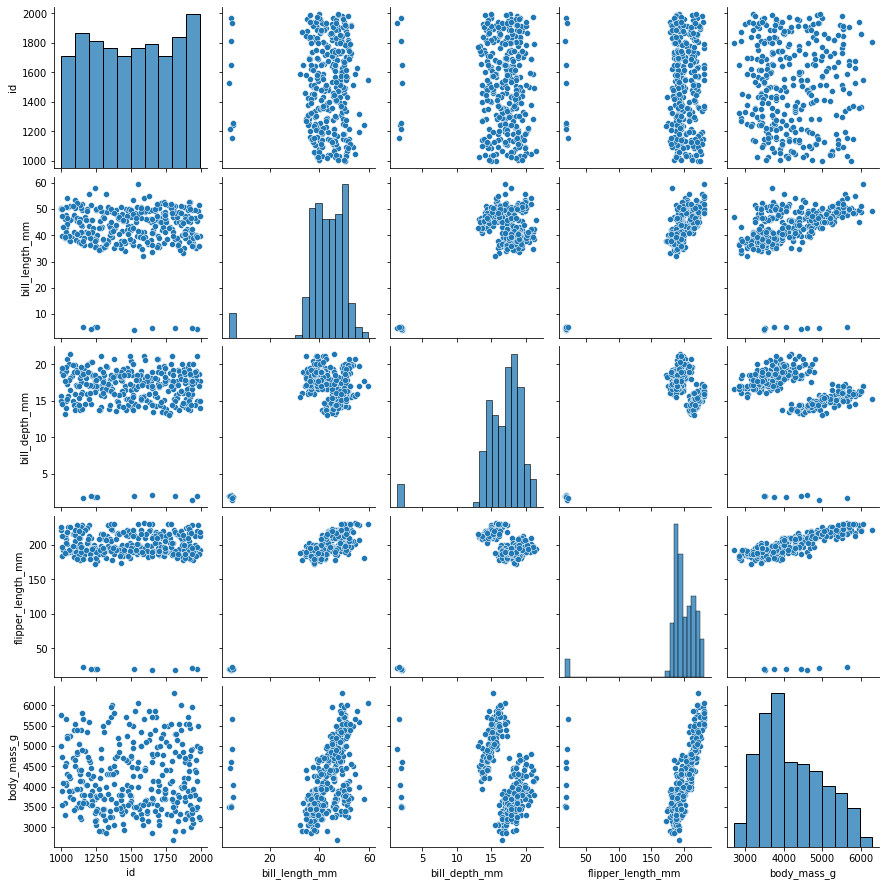

In [83]:
# 데이터 이상치 확인

sns.pairplot(df)

In [84]:
df.query("bill_depth_mm < 5")

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
40,1524,Adelie,Torgersen,Male,3.77,1.98,19.8,3500.0
57,1812,Chinstrap,Dream,Female,4.54,1.87,18.8,3525.0
125,1240,Chinstrap,Dream,Male,5.20,1.81,20.1,4050.0
141,1970,Adelie,Torgersen,Male,4.31,1.92,19.7,3500.0
210,1650,Adelie,Biscoe,Male,4.56,2.03,19.1,4600.0
303,1935,Gentoo,Biscoe,Female,4.72,1.37,21.4,4925.0
308,1212,Adelie,Torgersen,Male,4.18,1.94,19.8,4450.0
452,1256,Chinstrap,Dream,Male,5.13,1.82,19.7,3750.0
490,1152,Gentoo,Biscoe,Male,4.95,1.61,22.4,5650.0


In [85]:
df.query("body_mass_g == 3525.0")

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
57,1812,Chinstrap,Dream,Female,4.54,1.87,18.8,3525.0
178,1440,Chinstrap,Dream,Female,45.60,19.40,194.0,3525.0


In [86]:
df.query("(body_mass_g > 3500) & (body_mass_g < 3600)")

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
57,1812,Chinstrap,Dream,Female,4.54,1.87,18.8,3525.0
100,1570,Chinstrap,Dream,Male,50.90,19.10,196.0,3550.0
102,1567,Adelie,Torgersen,Female,39.60,17.20,196.0,3550.0
127,1688,Adelie,Dream,Female,35.70,18.00,202.0,3550.0
149,1622,Chinstrap,Dream,Female,45.90,17.10,190.0,3575.0
164,1006,Adelie,Biscoe,Male,39.70,18.90,184.0,3550.0
170,1922,Adelie,Dream,Female,42.20,18.50,180.0,3550.0
178,1440,Chinstrap,Dream,Female,45.60,19.40,194.0,3525.0
221,1204,Adelie,Torgersen,Female,36.20,16.10,187.0,3550.0
448,1584,Adelie,Biscoe,Female,39.00,17.50,186.0,3550.0


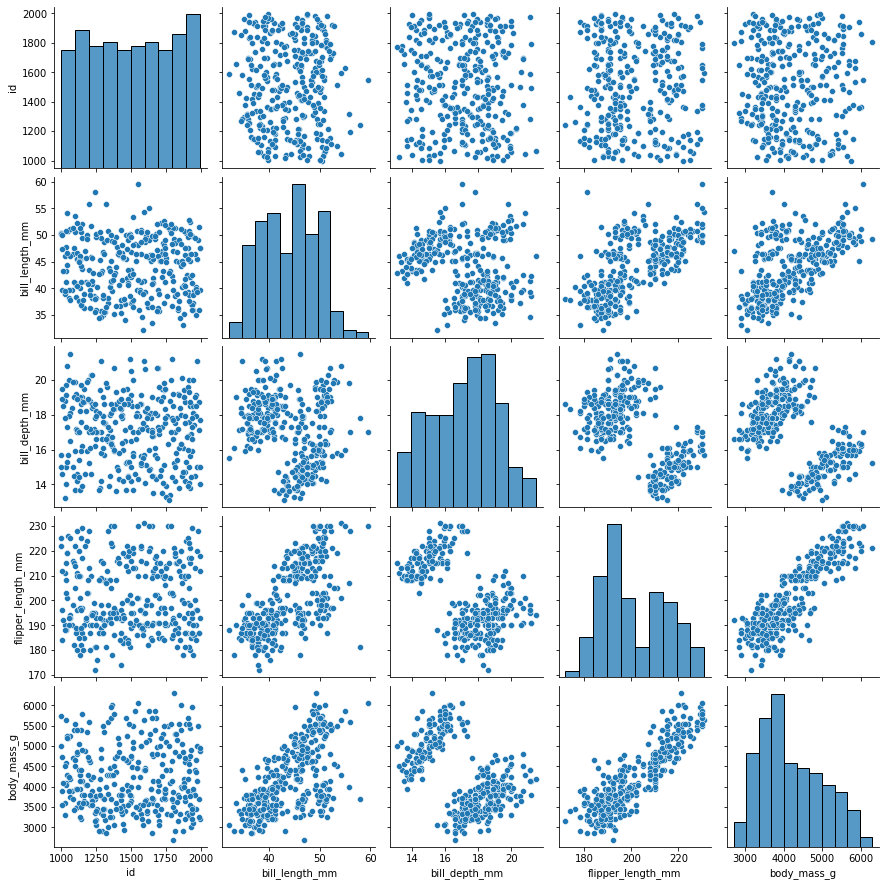

In [87]:
sns.pairplot(df.query("bill_depth_mm > 10"))

In [88]:
df = df.drop(index=df.query("bill_depth_mm < 10").index)

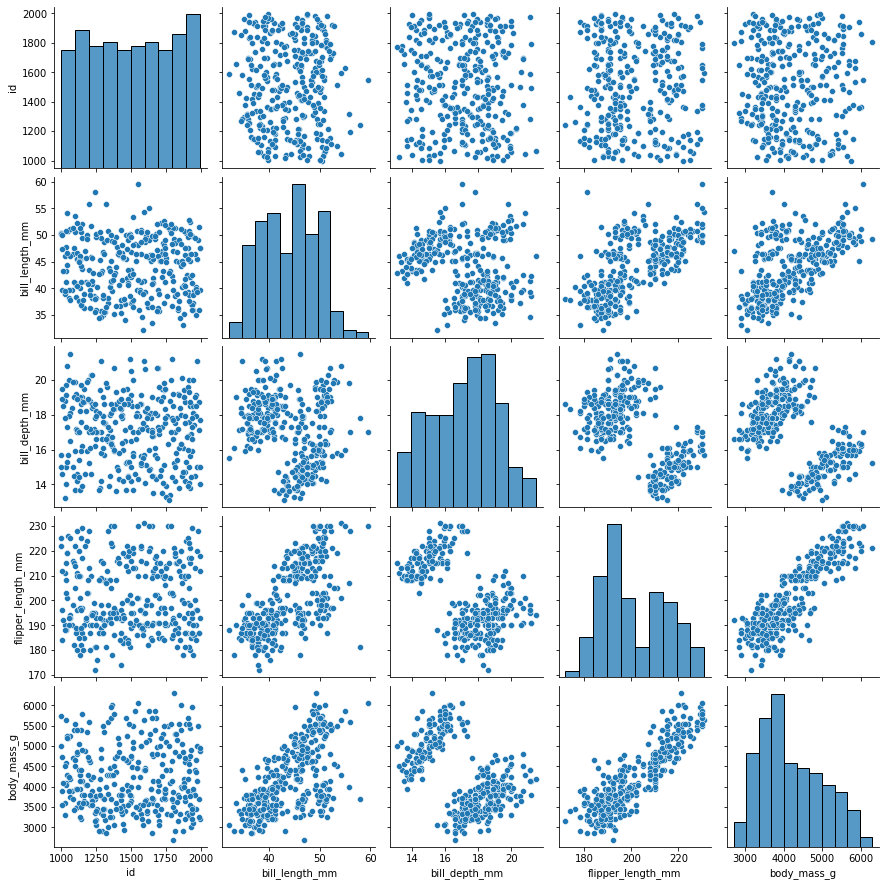

In [89]:
sns.pairplot(df)

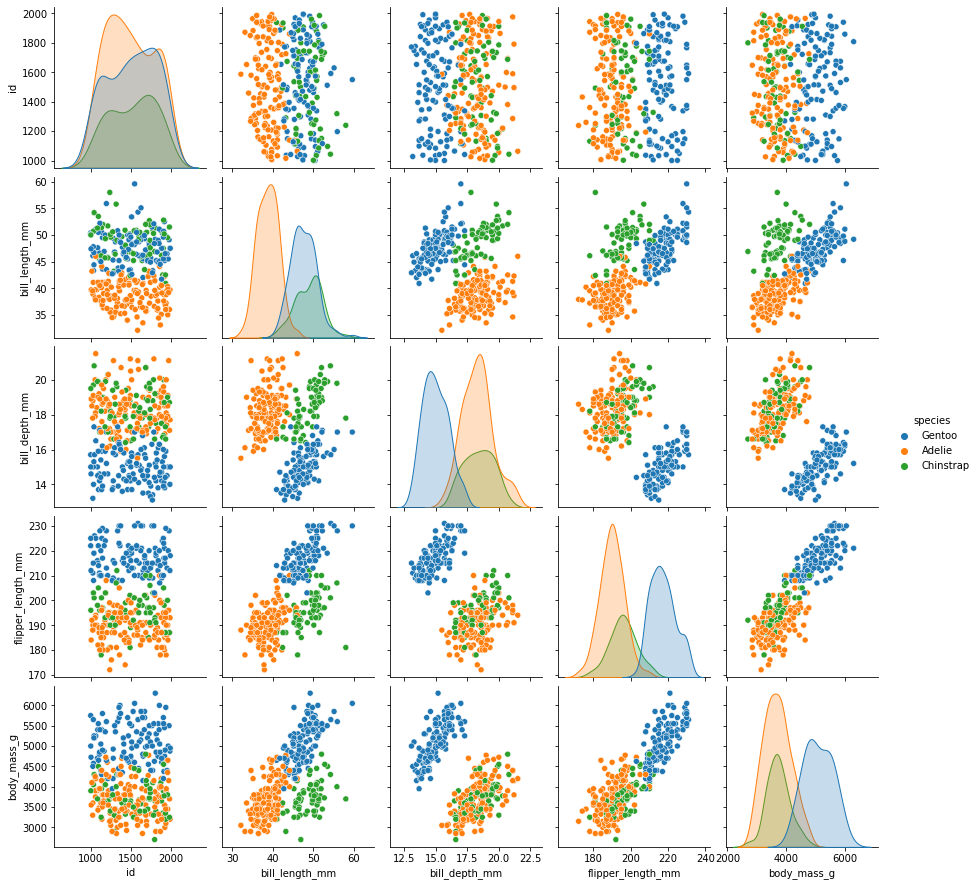

In [91]:
sns.pairplot(df, hue="species")

## Data Preparation

In [93]:
df.shape

(324, 8)

In [144]:
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "sex", "species", "island"]]
y = df["body_mass_g"]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Text(0.5, 1.0, 'testset')

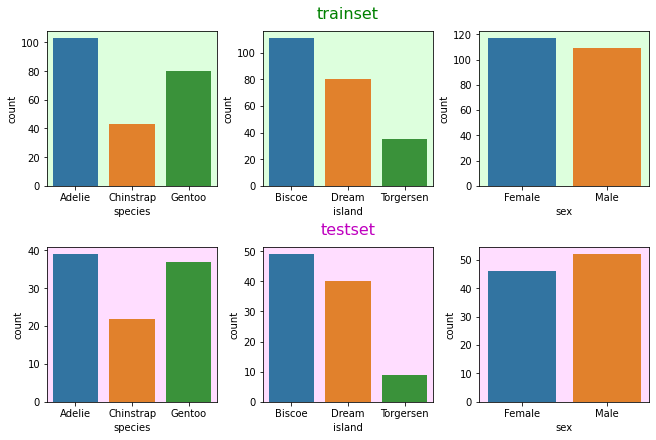

In [168]:
fig, axes = plt.subplots(ncols=3, nrows=2, 
                         figsize=(9,6), constrained_layout=True)

cols = ["species", "island", "sex"]

for ax, col in zip(axes[0], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_train[col], order=order, ax=ax)
    ax.set_facecolor("#DDFFDD")

for ax, col in zip(axes[1], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_test[col], order=order, ax=ax)
    ax.set_facecolor("#FFDDFF")

axes[0, 1].set_title("trainset", fontsize=16, color="g", pad=12)
axes[1, 1].set_title("testset", fontsize=16, color="m", pad=12)

In [153]:
np.sort(X["island"].unique())

array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)

In [138]:
# stratified sampling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=X["species"])

Text(0.5, 1.0, 'testset')

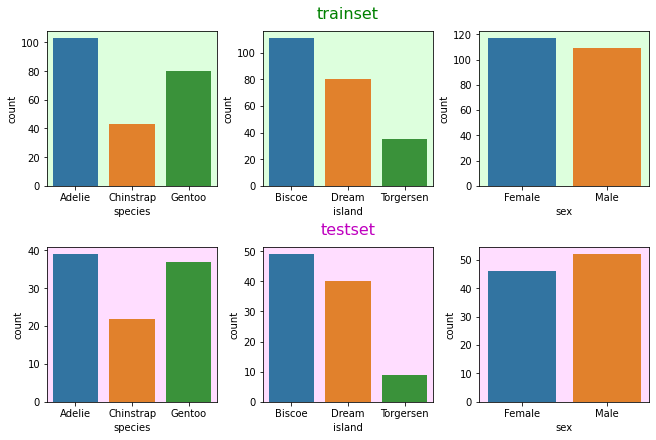

In [166]:
fig, axes = plt.subplots(ncols=3, nrows=2, 
                         figsize=(9,6), constrained_layout=True)

cols = ["species", "island", "sex"]

for ax, col in zip(axes[0], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_train[col], order=order, ax=ax)
    ax.set_facecolor("#DDFFDD")

for ax, col in zip(axes[1], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_test[col], order=order, ax=ax)
    ax.set_facecolor("#FFDDFF")
    
axes[0, 1].set_title("trainset", fontsize=16, color="g", pad=12)
axes[1, 1].set_title("testset", fontsize=16, color="m", pad=12)

## Machine Learning (1) get_dummies

In [172]:
X_train_1 = pd.get_dummies(X_train)
X_train_1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,sex_Female,sex_Male,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
442,47.6,18.3,195.0,1,0,0,1,0,0,1,0
438,48.2,15.6,221.0,0,1,0,0,1,1,0,0
52,37.2,19.4,184.0,0,1,1,0,0,0,0,1
448,39.0,17.5,186.0,1,0,1,0,0,1,0,0
312,46.8,15.4,215.0,0,1,0,0,1,1,0,0


In [173]:
rf = RandomForestRegressor()
rf.fit(X_train_1, y_train)

RandomForestRegressor()

In [174]:
y_train_pred = rf.predict(X_train_1)

X_test_1 = pd.get_dummies(X_test)
y_test_pred = rf.predict(X_test_1)

In [176]:
print(f"# R2_train = {r2_score(y_train, y_train_pred)}")
print(f"# R2_test = {r2_score(y_test, y_test_pred)}")

# R2_train = 0.9798553051604866
# R2_test = 0.8560074698548574


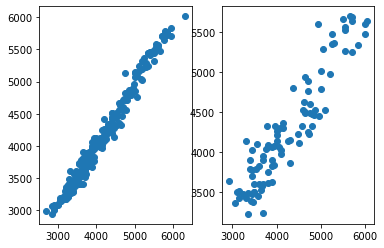

In [177]:
fig, axs = plt.subplots(ncols=2)

axs[0].scatter(y_train, y_train_pred)
axs[1].scatter(y_test, y_test_pred)

<BarContainer object of 11 artists>

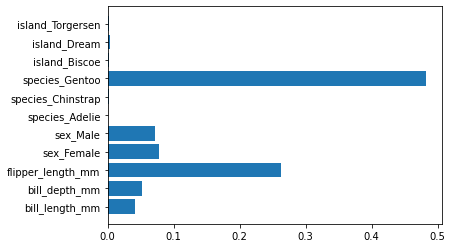

In [183]:
fi = rf.feature_importances_
plt.barh(X_train_1.columns, fi)